In [ ]:
# import pandas as pd

# Load the dataset
file_path = 'Mall_Customers .csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

In [3]:
# Display basic information about the dataset
df.info()

# Describe the dataset to get statistical information
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# processing the data

In [4]:
# Select relevant features for clustering
# For simplicity, we'll use 'Annual Income (k$)' and 'Spending Score (1-100)'

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display the selected features
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# applying k means clustering

C:\Users\Velis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Velis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Velis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Velis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

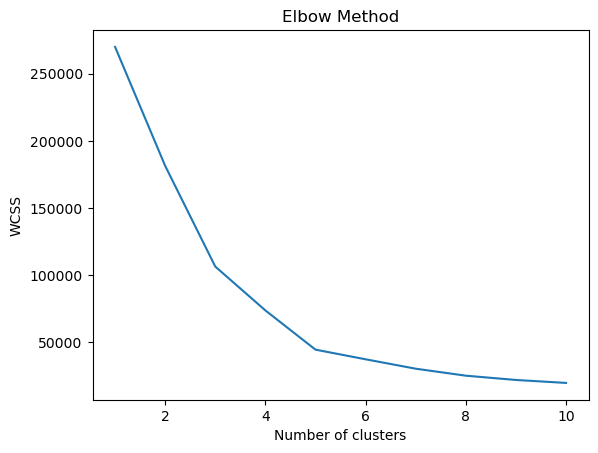

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Applying K-means to the dataset with the optimal number of clusters
optimal_clusters = 5  # Assuming 5 is the optimal number from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster information to the original dataframe
df['Cluster'] = y_kmeans

# Display the first few rows with cluster information
df.head()


C:\Users\Velis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


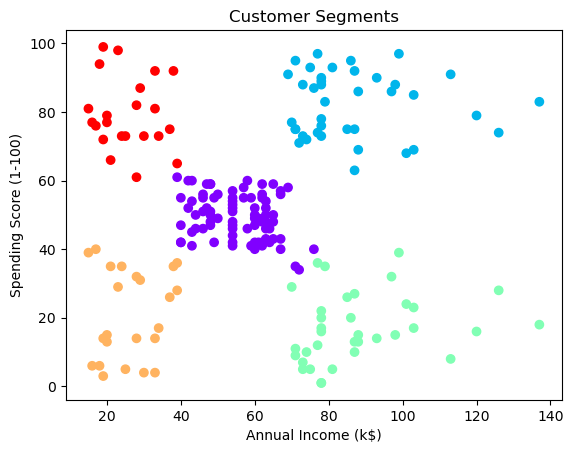

In [8]:
# Visualize the clusters
plt.scatter(X.values[:, 0], X.values[:, 1], c=y_kmeans, cmap='rainbow')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [9]:
# Display summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


C:\Users\Velis\AppData\Local\Temp\ipykernel_22896\1879791709.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,164.371429,41.114286,88.200000,17.114286
3,23.000000,45.217391,26.304348,20.913043
4,23.090909,25.272727,25.727273,79.363636
